<a href="https://colab.research.google.com/github/Malope-cmd/Malope-cmd/blob/main/Machine_Learning_Boundary_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
datafr = pd.read_excel('SynthData.xlsx')

In [ ]:
data = datafr.copy()

In [ ]:
data.head()

,Cov_1,Cov_2,Cat_Var
0,15,9,0
1,21,6,1
2,30,7,0
3,41,6,1
4,21,16,1


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
formula = 'Cat_Var ~ Cov_1 + Cov_2'

modlgt = smf.logit(formula=formula, data=data)
result = modlgt.fit()

Optimization terminated successfully.
         Current function value: 0.514372
         Iterations 6


In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Cat_Var   No. Observations:                   44
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.2535
Time:                        18:41:22   Log-Likelihood:                -22.632
converged:                       True   LL-Null:                       -30.316
Covariance Type:            nonrobust   LLR p-value:                 0.0004601
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8149      0.940      0.867      0.386      -1.028       2.658
Cov_1          0.0490      0.019      2.637      0.008       0.013       0.085
Cov_2         -0.1275      0.042     -3.035      0.0

<ipython-input-30-c3ae141fe3f9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = result.params[0]
<ipython-input-30-c3ae141fe3f9>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_1 = result.params[1]
<ipython-input-30-c3ae141fe3f9>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_2 = result.params[2]


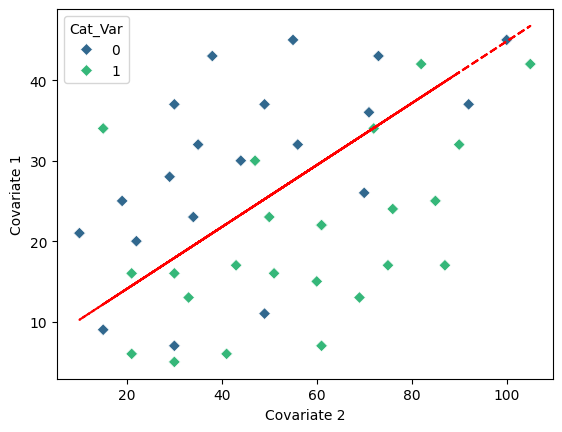

In [ ]:
intercept = result.params[0]
coef_1 = result.params[1]
coef_2 = result.params[2]

x_vals = np.array(data['Cov_1'])
y_vals = -(intercept + coef_1*x_vals) / (coef_2)

sns.scatterplot(x='Cov_1', y='Cov_2', hue='Cat_Var', data=data, marker='D',palette='viridis')
plt.xlabel('Covariate 2')
plt.ylabel('Covariate 1')

plt.plot(x_vals, y_vals, color='red', linestyle="--")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y = data['Cat_Var']
x = data[['Cov_1','Cov_2']]

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
xx = x.copy()
xx = scaler.transform(xx)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
modnn = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(3, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

modnn.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy', 'precision'])

In [ ]:
modnn.fit(x, y, epochs=50, batch_size=11)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8212 - loss: 0.5355 - precision: 0.7600
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8364 - loss: 0.5015 - precision: 0.8273
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8091 - loss: 0.5554 - precision: 0.7590
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8212 - loss: 0.5275 - precision: 0.8267
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7970 - loss: 0.5053 - precision: 0.8406
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8121 - loss: 0.5154 - precision: 0.7950 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8030 - loss: 0.5423 - precision: 0.8137
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7576 - loss: 0.5375 - precision: 0.7729
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7667 - loss: 0.5490 - precision: 0.8367 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7667 - 

In [ ]:
preds = modnn.predict(xx)
pred_labels = (preds > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
x_min, x_max = data['Cov_1'].min() -1, data['Cov_1'].max() +1
y_min, y_max = data['Cov_2'].min() - 1, data['Cov_2'].max() + 1

XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.1),
                 np.arange(y_min, y_max, 0.1))

In [ ]:
grid_points = np.c_[XX.ravel(), YY.ravel()]
grid_points_sc = scaler.transform(grid_points)

Z = modnn.predict(grid_points_sc)
Z = Z.reshape(XX.shape)

   32/12732 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


12732/12732 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


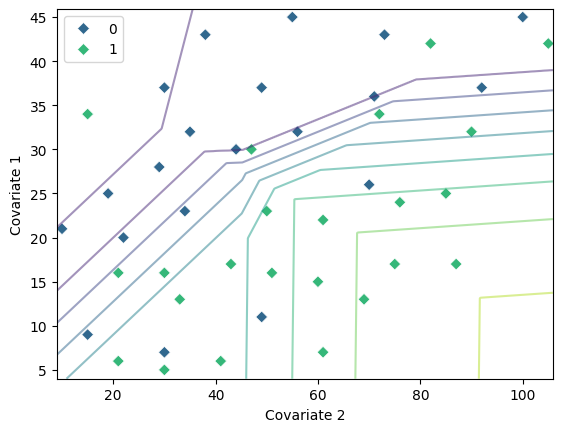

In [ ]:
sns.scatterplot(x='Cov_1', y='Cov_2', hue='Cat_Var', data=data, marker='D', palette='viridis')
plt.contour(XX, YY, Z, alpha=0.5, cmap='viridis')
plt.xlabel('Covariate 2')
plt.ylabel('Covariate 1')
plt.legend()
plt.show()